**Chennai House Price Prediction**

**Problem Statement Real estate transactions are quite opaque sometimes and it may be difficult for a newbie to know the fair price of any given home. Thus, multiple real estate websites have the functionality to predict the prices of houses given different features regarding it. Such forecasting models will help buyers to identify a fair price for the home and also give insights to sellers as to how to build homes that fetch them more money. Chennai house sale price data is shared here and the participants are expected to build a sale price prediction model that will aid the customers to find a fair price for their homes and also help the sellers understand what factors are fetching more money for the houses?**

**Data The historical sale data is available here.**

**Minimum Requirements It is not sufficient to just fit a model - the model must be analysed to find the important factors that contribute towards the price. Also, it will be better to give a forecast range (range of permissible values) rather than a single estimate as it will help the customers to negotiate. bold text**

**DATASET LINK=https://docs.google.com/document/d/1R_fqWoLPTUJDuktxU55KKfuiBZyQMfn53sEyImq6gJY/edit**

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [138]:
df=pd.read_csv("/content/train-chennai-sale.csv")
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


# **Finding any duplicate rows are present in the data set**

In [139]:
df.duplicated().any()

False

**There are no duplicates in the data set**

# **Finding any null values present in the data set**

In [140]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

### **There are null values present in the features of N_BEDROOM,N_BATHROOM and QS_OVERALL .**

In [141]:
df.N_BEDROOM.value_counts()

1.0    3795
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64

**We can fill the null values by using the mode function**

In [142]:
df["N_BEDROOM"]=df["N_BEDROOM"].fillna(df["N_BEDROOM"].mode()[0])

In [ ]:
df.N_BATHROOM.value_counts()

1.0    5589
2.0    1515
Name: N_BATHROOM, dtype: int64

**We can fill the null values by using the mode function**

In [143]:
df["N_BATHROOM"]=df["N_BATHROOM"].fillna(df["N_BATHROOM"].mode()[0])

In [144]:
df.head(5)

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


# **Droping the unwanted features in Data set**

Reasons for droping the features

1.'PRT_ID' feature has unique values.

2.'REG_FEE','COMMIS are registeration fees and commision that will be calculated after the sale of the property.



In [145]:
df=df.drop(['PRT_ID','REG_FEE','COMMIS'],axis=1)

# **Cleaning features by features**

In [146]:
df.dtypes

AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
SALES_PRICE        int64
dtype: object

AREA 

In [147]:
df.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [148]:
rp1={"Karapakam":"Karapakkam","Ann Nagar":"Anna Nagar","Adyr":"Adyar","Velchery":"Velachery","Chormpet":"Chrompet","Chrompt":"Chrompet","Chrmpet":"Chrompet","Ana Nagar":"Anna Nagar","TNagar":"T Nagar","KKNagar":"KK Nagar"}

In [149]:
df["AREA"]=df["AREA"].replace(rp1)

In [150]:
df.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

**N_BEDROOM and N_BATHROOM**

**Changing the data types float to integer for N_BEDROOM and N_BATHROOM**

In [151]:
df["N_BATHROOM"]=df["N_BATHROOM"].astype(int)
df["N_BEDROOM"]=df["N_BEDROOM"].astype(int)

In [152]:
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
0,Karapakkam,1004,04-05-2011,131,1,1,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000
1,Anna Nagar,1986,19-12-2006,26,2,1,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770
2,Adyar,909,04-02-2012,70,1,1,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200
3,Velachery,1855,13-03-2010,14,3,2,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290
4,Karapakkam,1226,05-10-2009,84,1,1,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250


**DATE_SALE and DATE_BUILD**

**changing datatype to datetime format**

In [153]:
df["DATE_SALE"]=pd.to_datetime(df["DATE_SALE"])
df["DATE_BUILD"]=pd.to_datetime(df["DATE_BUILD"])

In [154]:
df.dtypes

AREA                     object
INT_SQFT                  int64
DATE_SALE        datetime64[ns]
DIST_MAINROAD             int64
N_BEDROOM                 int64
N_BATHROOM                int64
N_ROOM                    int64
SALE_COND                object
PARK_FACIL               object
DATE_BUILD       datetime64[ns]
BUILDTYPE                object
UTILITY_AVAIL            object
STREET                   object
MZZONE                   object
QS_ROOMS                float64
QS_BATHROOM             float64
QS_BEDROOM              float64
QS_OVERALL              float64
SALES_PRICE               int64
dtype: object

In [155]:
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
0,Karapakkam,1004,2011-04-05,131,1,1,3,AbNormal,Yes,1967-05-15,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000
1,Anna Nagar,1986,2006-12-19,26,2,1,5,AbNormal,No,1995-12-22,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770
2,Adyar,909,2012-04-02,70,1,1,3,AbNormal,Yes,1992-09-02,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200
3,Velachery,1855,2010-03-13,14,3,2,5,Family,No,1988-03-18,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290
4,Karapakkam,1226,2009-05-10,84,1,1,3,AbNormal,Yes,1979-10-13,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250


**SALE_COND**

In [156]:
df.SALE_COND.value_counts()

AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl          1
Name: SALE_COND, dtype: int64

In [157]:
sp={"Adj Land":"AdjLand","Partiall":"Partial","PartiaLl":"Partial","Ab Normal":"AbNormal"}

In [158]:
df["SALE_COND"]=df["SALE_COND"].replace(sp)

In [159]:
df.SALE_COND.value_counts()

AdjLand        1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: SALE_COND, dtype: int64

**PARK_FACIL**

In [160]:
df.PARK_FACIL.value_counts()

Yes    3587
No     3520
Noo       2
Name: PARK_FACIL, dtype: int64

In [161]:
df["PARK_FACIL"]=df["PARK_FACIL"].replace({"Noo":"No"})

In [162]:
df.PARK_FACIL.value_counts()

Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64

**BUILDTYPE**

In [163]:
df.BUILDTYPE.value_counts()

House         2444
Commercial    2325
Others        2310
Other           26
Comercial        4
Name: BUILDTYPE, dtype: int64

In [164]:
df["BUILDTYPE"]=df["BUILDTYPE"].replace({"Comercial":"Commercial","Other":"Others"})

In [165]:
df.BUILDTYPE.value_counts()

House         2444
Others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

**UTILITY_AVAIL**

In [166]:
df.UTILITY_AVAIL.value_counts()

AllPub     1886
NoSeWa     1871
NoSewr     1829
ELO        1522
All Pub       1
Name: UTILITY_AVAIL, dtype: int64

In [167]:
q={"All Pub":"AllPub","NoSeWa":"NoSewr","NoSewr ":"NoSewr"}

In [168]:
df["UTILITY_AVAIL"]=df["UTILITY_AVAIL"].replace(q)

In [169]:
df.UTILITY_AVAIL.value_counts()

NoSewr    3700
AllPub    1887
ELO       1522
Name: UTILITY_AVAIL, dtype: int64

**STREET**

In [170]:
df.STREET.value_counts()

Paved        2560
Gravel       2520
No Access    2010
Pavd           12
NoAccess        7
Name: STREET, dtype: int64

In [171]:
b={"Pavd":"Paved","NoAccess":"No Access"}

In [172]:
df["STREET"]=df["STREET"].replace(b)

In [173]:
df.STREET.value_counts()

Paved        2572
Gravel       2520
No Access    2017
Name: STREET, dtype: int64

In [174]:
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
0,Karapakkam,1004,2011-04-05,131,1,1,3,AbNormal,Yes,1967-05-15,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000
1,Anna Nagar,1986,2006-12-19,26,2,1,5,AbNormal,No,1995-12-22,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770
2,Adyar,909,2012-04-02,70,1,1,3,AbNormal,Yes,1992-09-02,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200
3,Velachery,1855,2010-03-13,14,3,2,5,Family,No,1988-03-18,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290
4,Karapakkam,1226,2009-05-10,84,1,1,3,AbNormal,Yes,1979-10-13,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250


**MZZONE**

In [175]:
df.MZZONE.value_counts()

RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: MZZONE, dtype: int64

In [176]:
df.dtypes

AREA                     object
INT_SQFT                  int64
DATE_SALE        datetime64[ns]
DIST_MAINROAD             int64
N_BEDROOM                 int64
N_BATHROOM                int64
N_ROOM                    int64
SALE_COND                object
PARK_FACIL               object
DATE_BUILD       datetime64[ns]
BUILDTYPE                object
UTILITY_AVAIL            object
STREET                   object
MZZONE                   object
QS_ROOMS                float64
QS_BATHROOM             float64
QS_BEDROOM              float64
QS_OVERALL              float64
SALES_PRICE               int64
dtype: object

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   AREA           7109 non-null   object        
 1   INT_SQFT       7109 non-null   int64         
 2   DATE_SALE      7109 non-null   datetime64[ns]
 3   DIST_MAINROAD  7109 non-null   int64         
 4   N_BEDROOM      7109 non-null   int64         
 5   N_BATHROOM     7109 non-null   int64         
 6   N_ROOM         7109 non-null   int64         
 7   SALE_COND      7109 non-null   object        
 8   PARK_FACIL     7109 non-null   object        
 9   DATE_BUILD     7109 non-null   datetime64[ns]
 10  BUILDTYPE      7109 non-null   object        
 11  UTILITY_AVAIL  7109 non-null   object        
 12  STREET         7109 non-null   object        
 13  MZZONE         7109 non-null   object        
 14  QS_ROOMS       7109 non-null   float64       
 15  QS_BATHROOM    7109 n

# **Exploratory data analysis**

In [178]:
df.select_dtypes(include="number").columns

Index(['INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM',
       'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'SALES_PRICE'],
      dtype='object')

**"INT SQFT vs SALES PRICE"**

<Figure size 720x720 with 0 Axes>

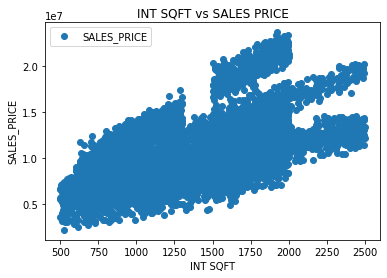

In [179]:
plt.figure(figsize=(10,10))
df.plot(x='INT_SQFT',y='SALES_PRICE',style='o')
plt.title("INT SQFT vs SALES PRICE")
plt.xlabel("INT SQFT")
plt.ylabel("SALES_PRICE")
plt.show()


In [180]:
df[["INT_SQFT","SALES_PRICE"]].corr()

,INT_SQFT,SALES_PRICE
INT_SQFT,1.000000,0.612125
SALES_PRICE,0.612125,1.000000


# **There is a linear relationship between the INT_SQFT and SALES_PRICE so no is transfromation required** 

**"DIST_MAINROAD vs SALES_PRICE"**

<Figure size 720x720 with 0 Axes>

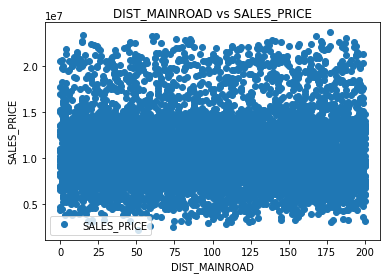

In [181]:
plt.figure(figsize=(10,10))
df.plot(x='DIST_MAINROAD',y="SALES_PRICE",style="o")
plt.title("DIST_MAINROAD vs SALES_PRICE")
plt.xlabel("DIST_MAINROAD")
plt.ylabel("SALES_PRICE")
plt.show()

In [182]:
df[["DIST_MAINROAD","SALES_PRICE"]].corr()

,DIST_MAINROAD,SALES_PRICE
DIST_MAINROAD,1.000000,0.018783
SALES_PRICE,0.018783,1.000000


# **There is a no linear relationship between the DIST_MAINROAD and SALES_PRICE so transfromation required**

<Figure size 720x720 with 0 Axes>

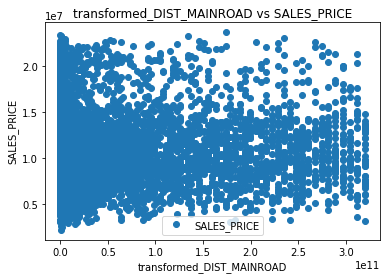

,transformed_DIST_MAINROAD,SALES_PRICE
transformed_DIST_MAINROAD,1.000000,0.021188
SALES_PRICE,0.021188,1.000000


In [183]:
plt.figure(figsize=(10,10))
df["transformed_DIST_MAINROAD"]=np.power(df["DIST_MAINROAD"],5)
df.plot(x='transformed_DIST_MAINROAD',y="SALES_PRICE",style="o")
plt.title("transformed_DIST_MAINROAD vs SALES_PRICE")
plt.xlabel("transformed_DIST_MAINROAD")
plt.ylabel("SALES_PRICE")
plt.show()
df[["transformed_DIST_MAINROAD","SALES_PRICE"]].corr()

# **Even after lot of transformation in DIST_MAINROAD feature there is no linear relationship with SALES_PRICE.So that we can drop the feature (DIST_MAINROAD)**

In [184]:
df=df.drop(['DIST_MAINROAD','transformed_DIST_MAINROAD'],axis=1)

**"N_BEDROOM vs SALES_PRICE"**

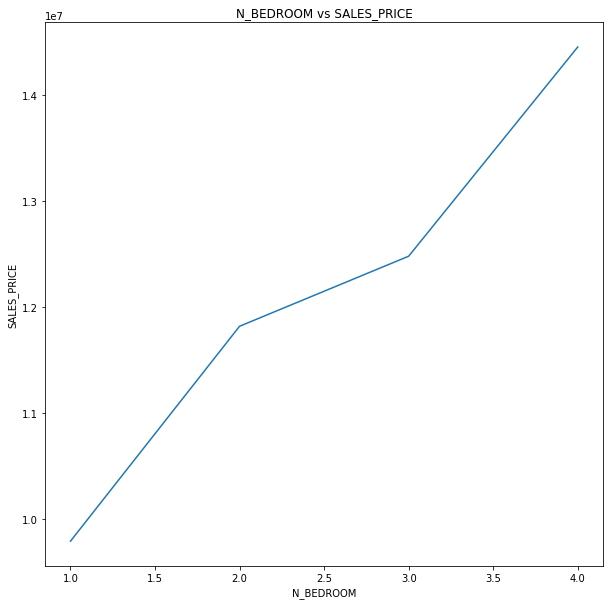

,N_BEDROOM,SALES_PRICE
N_BEDROOM,1.000000,0.330987
SALES_PRICE,0.330987,1.000000


In [185]:
plt.figure(figsize=(10,10))
#df.plot(x="N_BEDROOM",y="SALES_PRICE",style="o")
df.groupby("N_BEDROOM")["SALES_PRICE"].mean().plot()
plt.title("N_BEDROOM vs SALES_PRICE")
plt.xlabel("N_BEDROOM")
plt.ylabel("SALES_PRICE")
plt.show()
df[["N_BEDROOM","SALES_PRICE"]].corr()

# **There is a linear relationship between the N_BEDROOM and SALES_PRICE so no is transfromation required** 

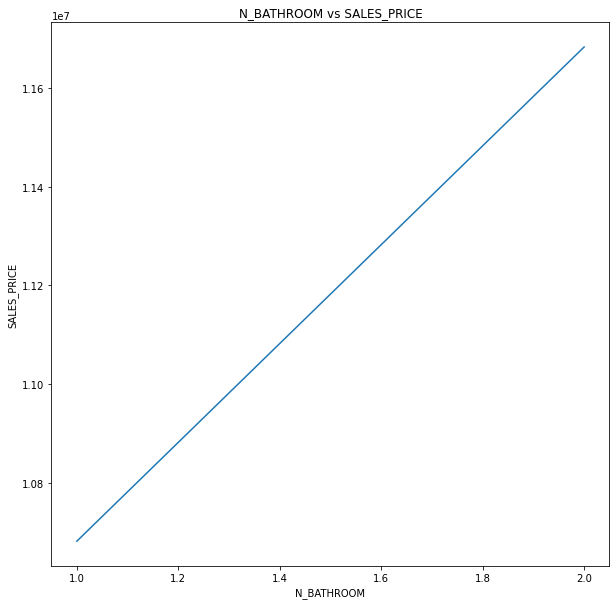

,N_BATHROOM,SALES_PRICE
N_BATHROOM,1.000000,0.108834
SALES_PRICE,0.108834,1.000000


In [186]:
plt.figure(figsize=(10,10))
#df.plot(x="N_BATHROOM",y="SALES_PRICE",style="o")
df.groupby("N_BATHROOM")["SALES_PRICE"].mean().plot()
plt.title("N_BATHROOM vs SALES_PRICE")
plt.xlabel("N_BATHROOM")
plt.ylabel("SALES_PRICE")
plt.show()
df[["N_BATHROOM","SALES_PRICE"]].corr()

# **There is a low linear relationship between the N_BATHROOM and SALES_PRICE so transfromation required**

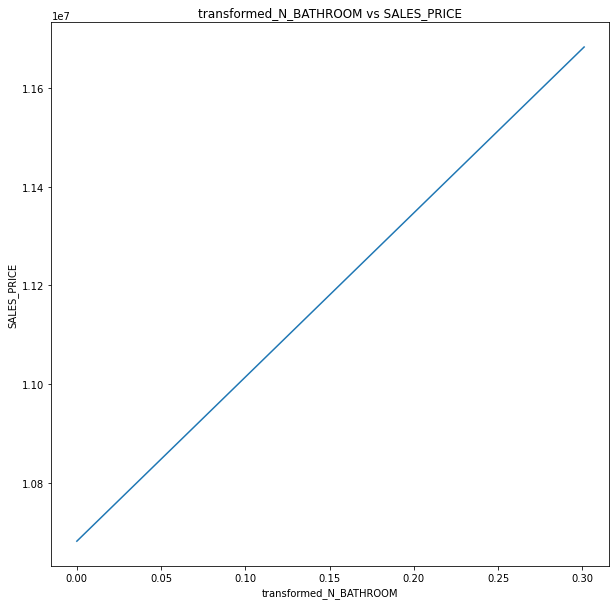

,transformed_N_BATHROOM,SALES_PRICE
transformed_N_BATHROOM,1.000000,0.108834
SALES_PRICE,0.108834,1.000000


In [187]:
plt.figure(figsize=(10,10))
df["transformed_N_BATHROOM"]=np.log10(df["N_BATHROOM"])
#df.plot(x="transformed_N_BATHROOM",y="SALES_PRICE",style="o")
df.groupby("transformed_N_BATHROOM")["SALES_PRICE"].mean().plot()
plt.title("transformed_N_BATHROOM vs SALES_PRICE")
plt.xlabel("transformed_N_BATHROOM")
plt.ylabel("SALES_PRICE")
plt.show()
df[["transformed_N_BATHROOM","SALES_PRICE"]].corr()

# **Even after lot of transformation in transformed_N_BATHROOM feature there is low linear relationship with SALES_PRICE.So that we can drop that feature ** **bold text**

In [188]:
df=df.drop(['N_BATHROOM','transformed_N_BATHROOM'],axis=1)

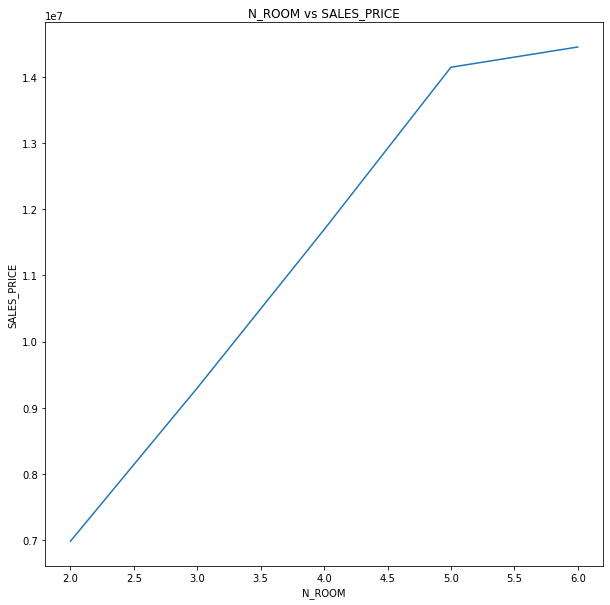

,N_ROOM,SALES_PRICE
N_ROOM,1.00000,0.60276
SALES_PRICE,0.60276,1.00000


In [189]:
plt.figure(figsize=(10,10))
#df.plot(x="N_ROOM",y="SALES_PRICE",style="o")
df.groupby("N_ROOM")["SALES_PRICE"].mean().plot()
plt.title("N_ROOM vs SALES_PRICE")
plt.xlabel("N_ROOM")
plt.ylabel("SALES_PRICE")
plt.show()
df[["N_ROOM","SALES_PRICE"]].corr()

# **There is a linear relationship between the N_ROOM and SALES_PRICE so no is transfromation required**

# **Droping the unwanted features in Data set**

**'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL' and 'QS_BATHROOM' are masked features**

In [190]:
df=df.drop(['QS_ROOMS','QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL'],axis=1)

In [191]:
df.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'N_BEDROOM', 'N_ROOM', 'SALE_COND',
       'PARK_FACIL', 'DATE_BUILD', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET',
       'MZZONE', 'SALES_PRICE'],
      dtype='object')

In [192]:
df['AGE_OF_BUILDING']=(df['DATE_SALE']-df['DATE_BUILD'])/np.timedelta64(1,'Y')
df.head()

,AREA,INT_SQFT,DATE_SALE,N_BEDROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE_OF_BUILDING
0,Karapakkam,1004,2011-04-05,1,3,AbNormal,Yes,1967-05-15,Commercial,AllPub,Paved,A,7600000,43.891387
1,Anna Nagar,1986,2006-12-19,2,5,AbNormal,No,1995-12-22,Commercial,AllPub,Gravel,RH,21717770,10.992697
2,Adyar,909,2012-04-02,1,3,AbNormal,Yes,1992-09-02,Commercial,ELO,Gravel,RL,13159200,19.581511
3,Velachery,1855,2010-03-13,3,5,Family,No,1988-03-18,Others,NoSewr,Paved,I,9630290,21.985393
4,Karapakkam,1226,2009-05-10,1,3,AbNormal,Yes,1979-10-13,Others,AllPub,Gravel,C,7406250,29.574871


In [193]:
#Changing the datatype of the age from the float to int
df['AGE_OF_BUILDING']=df['AGE_OF_BUILDING'].astype('int')

In [194]:
df=df.drop(["DATE_SALE","DATE_BUILD"],axis=1)

In [195]:
df.head()

,AREA,INT_SQFT,N_BEDROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE_OF_BUILDING
0,Karapakkam,1004,1,3,AbNormal,Yes,Commercial,AllPub,Paved,A,7600000,43
1,Anna Nagar,1986,2,5,AbNormal,No,Commercial,AllPub,Gravel,RH,21717770,10
2,Adyar,909,1,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,13159200,19
3,Velachery,1855,3,5,Family,No,Others,NoSewr,Paved,I,9630290,21
4,Karapakkam,1226,1,3,AbNormal,Yes,Others,AllPub,Gravel,C,7406250,29


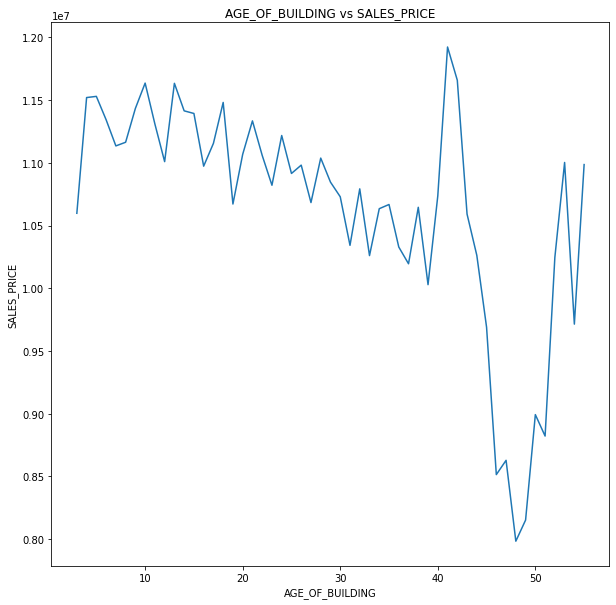

,AGE_OF_BUILDING,SALES_PRICE
AGE_OF_BUILDING,1.000000,-0.119192
SALES_PRICE,-0.119192,1.000000


In [196]:
plt.figure(figsize=(10,10))
#df.plot(x="AGE_OF_BUILDING",y="SALES_PRICE",style="o")
df.groupby("AGE_OF_BUILDING")["SALES_PRICE"].mean().plot()
plt.title("AGE_OF_BUILDING vs SALES_PRICE")
plt.xlabel("AGE_OF_BUILDING")
plt.ylabel("SALES_PRICE")
plt.show()
df[["AGE_OF_BUILDING","SALES_PRICE"]].corr()

# **There is a linear relationship between the AGE_OF_BUILDING and SALES_PRICE so no is transfromation required**

# **CHECKING FOR OUTLIER**

In [60]:
df.select_dtypes(include="number").columns

Index(['INT_SQFT', 'N_BEDROOM', 'N_ROOM', 'SALES_PRICE', 'AGE_OF_BUILDING'], dtype='object')

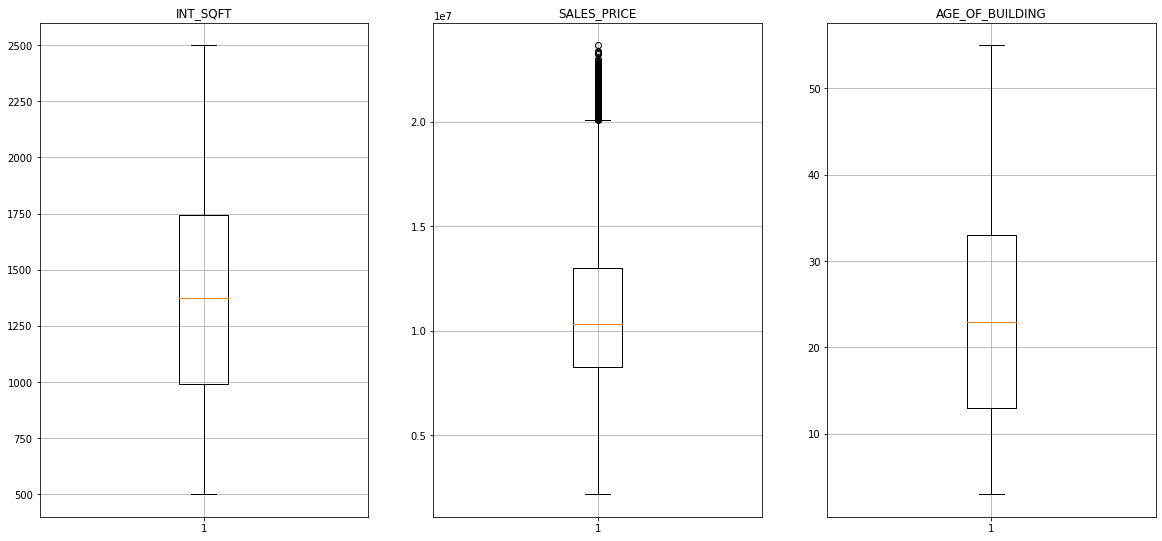

In [93]:
plt.figure(figsize=(20,20))
plt.subplot(231)
plt.boxplot(df["INT_SQFT"])
plt.title("INT_SQFT")
plt.grid(True)


plt.subplot(232)
plt.boxplot(df["SALES_PRICE"])
plt.title("SALES_PRICE")
plt.grid(True)

plt.subplot(233)
plt.boxplot(df["AGE_OF_BUILDING"])
plt.title("AGE_OF_BUILDING")
plt.grid(True)

# **There is Outliers in Sale Price. But this is a valid one**

# **CONTINOUS DATA FEATURES:**

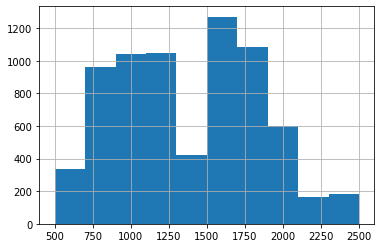

In [268]:
df.INT_SQFT.hist()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Area in Squarefeet')

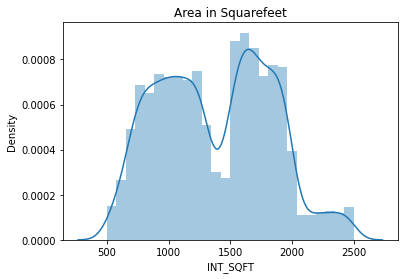

In [269]:
sns.distplot(df['INT_SQFT'])
plt.title('Area in Squarefeet')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'SALES PRICE')

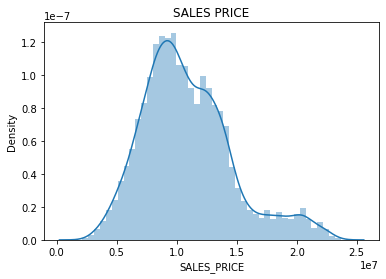

In [271]:
sns.distplot(df['SALES_PRICE'])
plt.title('SALES PRICE')

# **Exploratory data analysis for categorical features**

In [197]:
df.select_dtypes(include="object").columns

Index(['AREA', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE'],
      dtype='object')

Text(0.5, 1.0, 'BUILDTYPE')

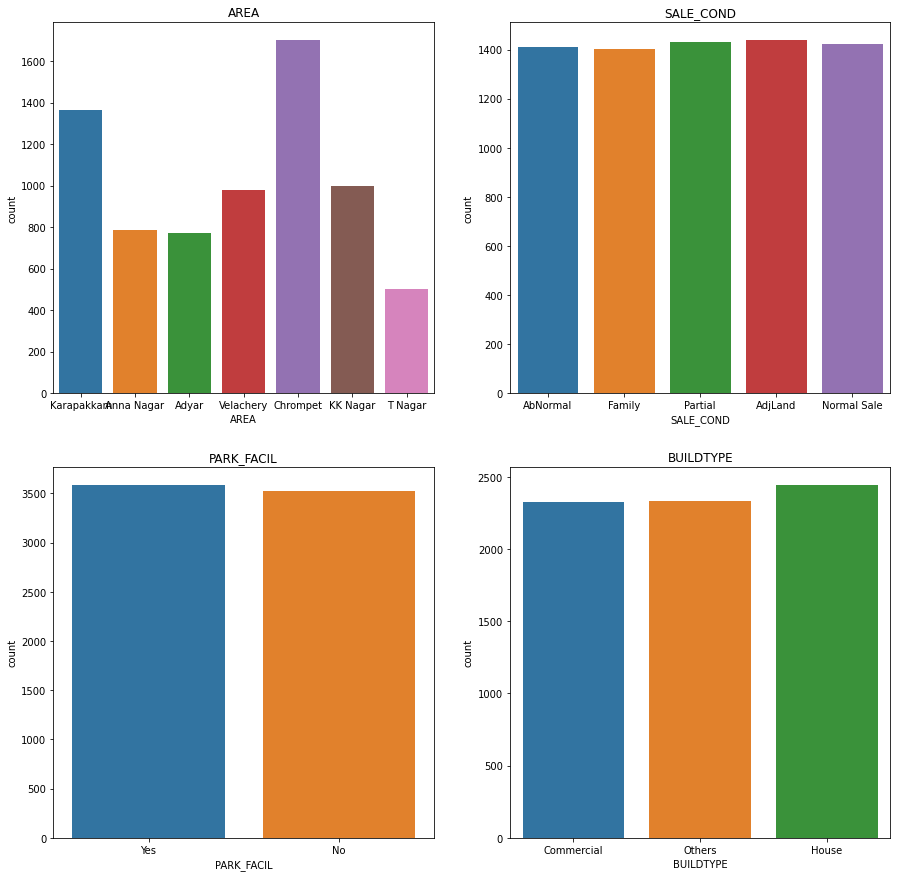

In [198]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
sns.countplot(data=df,x="AREA")
plt.title("AREA")


plt.subplot(2,2,2)
sns.countplot(data=df,x="SALE_COND")
plt.title("SALE_COND")


plt.subplot(2,2,3)
sns.countplot(data=df,x="PARK_FACIL")
plt.title("PARK_FACIL")


plt.subplot(2,2,4)
sns.countplot(data=df,x="BUILDTYPE")
plt.title("BUILDTYPE")



Text(0.5, 1.0, 'MZZONE')

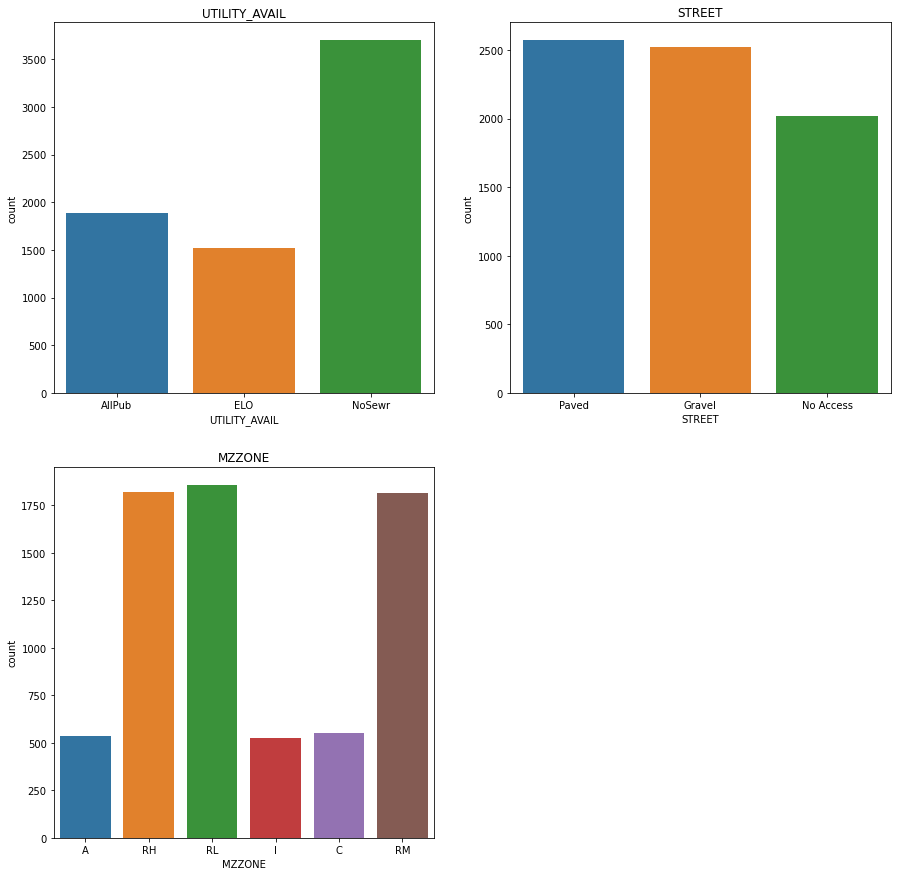

In [199]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
sns.countplot(data=df,x="UTILITY_AVAIL")
plt.title("UTILITY_AVAIL")

plt.subplot(2,2,2)
sns.countplot(data=df,x="STREET")
plt.title("STREET")

plt.subplot(2,2,3)
sns.countplot(data=df,x="MZZONE")
plt.title("MZZONE")




# **CATEGORICAL DATA FEATURE VS TARGET('SALES_PRICE'):**

Text(0.5, 1.0, 'AREA vs SALES_PRICE')

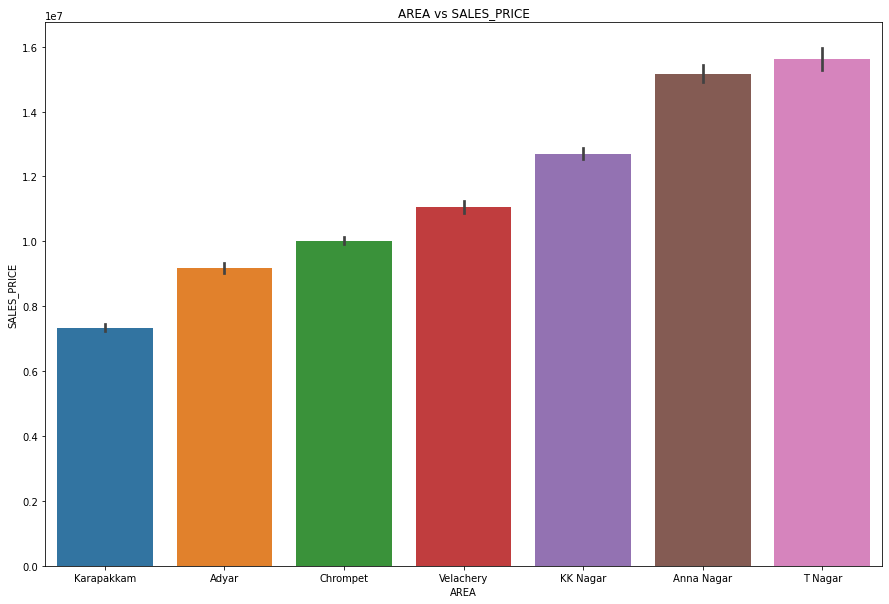

In [200]:

plt.figure(figsize=(15,10))
sns.barplot(x=df.AREA,y=df.SALES_PRICE,order=df.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA'])
plt.title('AREA vs SALES_PRICE')

# **A clear indication that there is a linear relationship between AREA and SALES_PRICE**

Text(0.5, 1.0, 'SALE_COND vs SALES_PRICE')

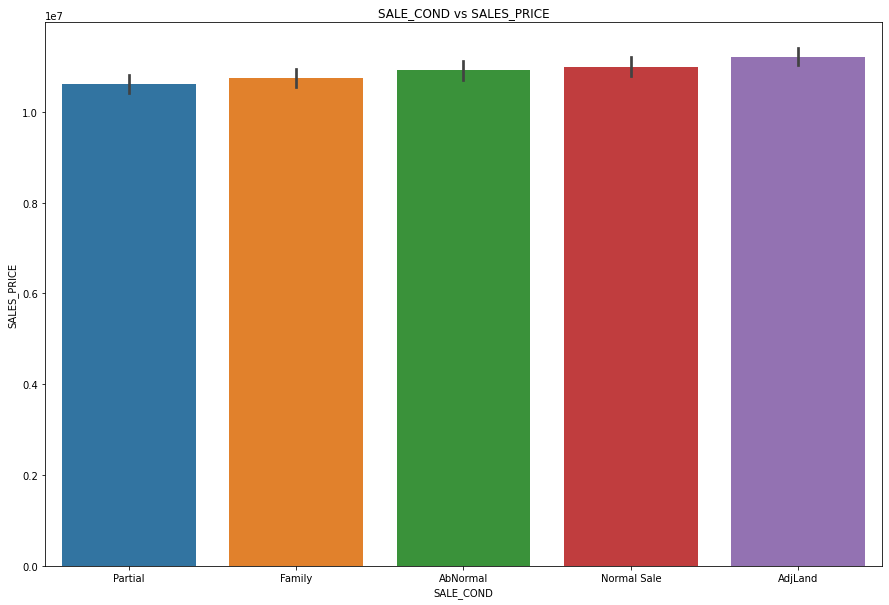

In [201]:

plt.figure(figsize=(15,10))
sns.barplot(x=df.SALE_COND,y=df.SALES_PRICE,order=df.groupby('SALE_COND')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['SALE_COND'])
plt.title('SALE_COND vs SALES_PRICE')

Text(0.5, 1.0, 'N_BEDROOM vs SALES_PRICE')

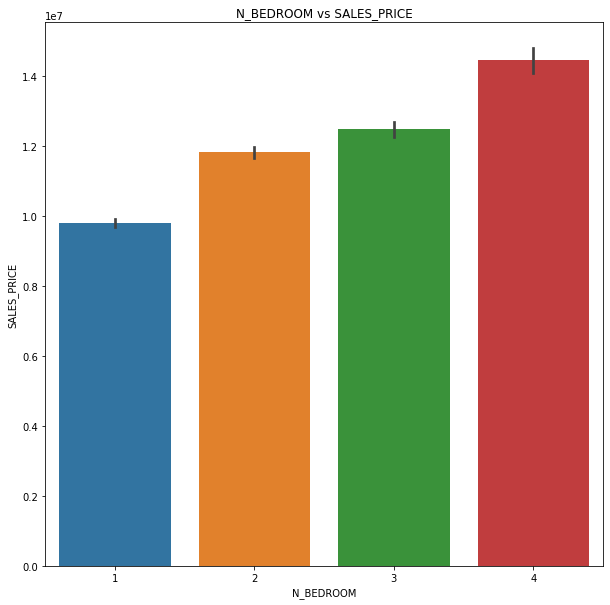

In [202]:
plt.figure(figsize=(10,10))
sns.barplot(x=df.N_BEDROOM,y=df.SALES_PRICE,order=df.groupby('N_BEDROOM')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['N_BEDROOM'])
plt.title('N_BEDROOM vs SALES_PRICE')

# **There is a slight linear relationship between SALE_COND and SALES_PRICE**

Text(0.5, 1.0, 'PARK_FACIL vs SALES_PRICE')

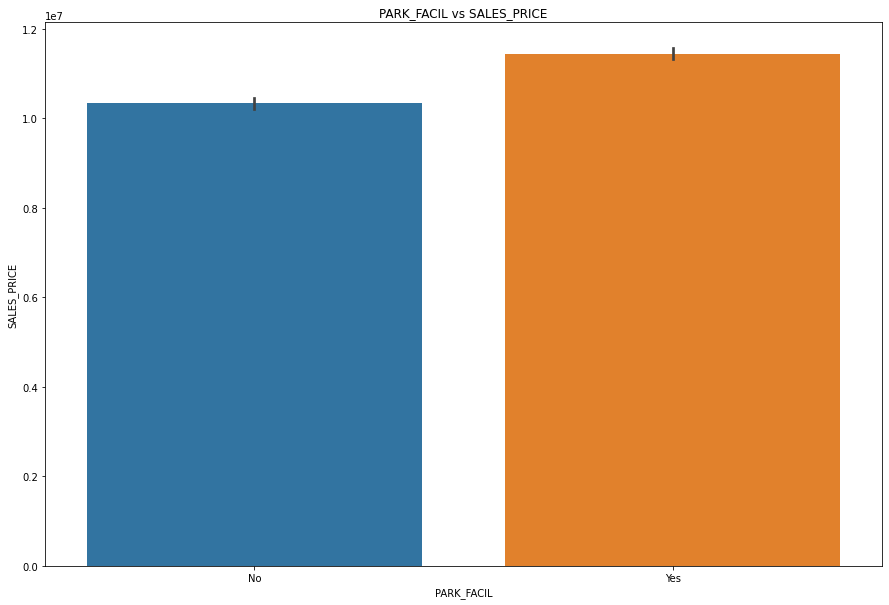

In [203]:
plt.figure(figsize=(15,10))
sns.barplot(x=df.PARK_FACIL,y=df.SALES_PRICE,order=df.groupby('PARK_FACIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['PARK_FACIL'])
plt.title('PARK_FACIL vs SALES_PRICE')

# **There is a linear relationship between PARK_FACIL and SALES_PRICE**

Text(0.5, 1.0, 'BUILDTYPE vs SALES_PRICE')

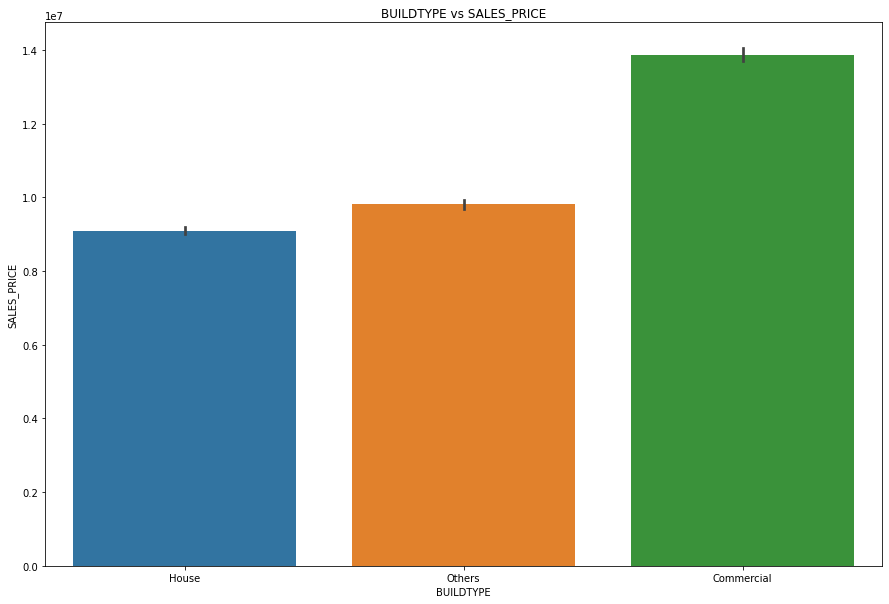

In [204]:
plt.figure(figsize=(15,10))
sns.barplot(x=df.BUILDTYPE,y=df.SALES_PRICE, order=df.groupby('BUILDTYPE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['BUILDTYPE'])
plt.title('BUILDTYPE vs SALES_PRICE')


There is relationship between the BUILDTYPE and SALES_PRICE.

The Sales price increases as per the buliding types 

Text(0.5, 1.0, 'STREET vs SALES_PRICE')

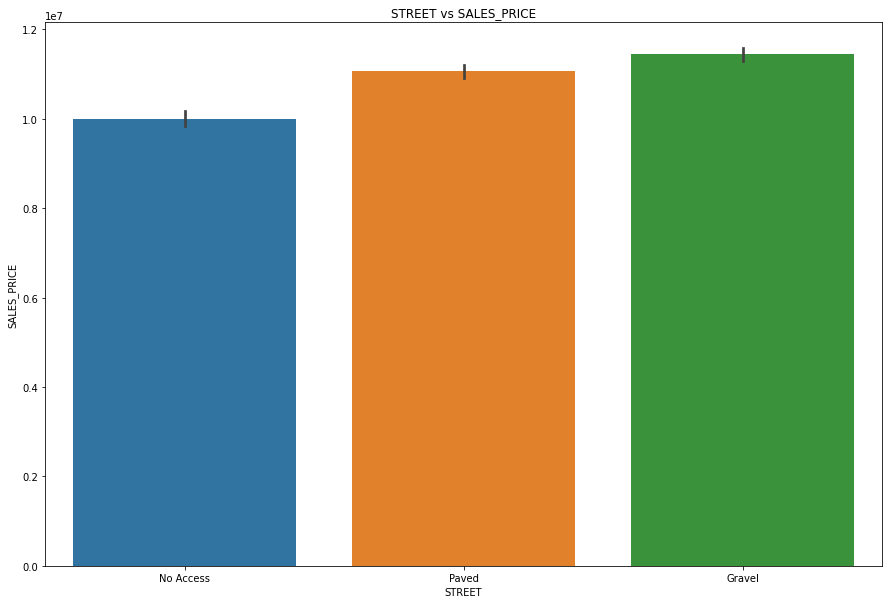

In [205]:
plt.figure(figsize=(15,10))
sns.barplot(x=df.STREET,y=df.SALES_PRICE,order=df.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET'])
plt.title('STREET vs SALES_PRICE')

Text(0.5, 1.0, 'MZZONE vs SALES_PRICE')

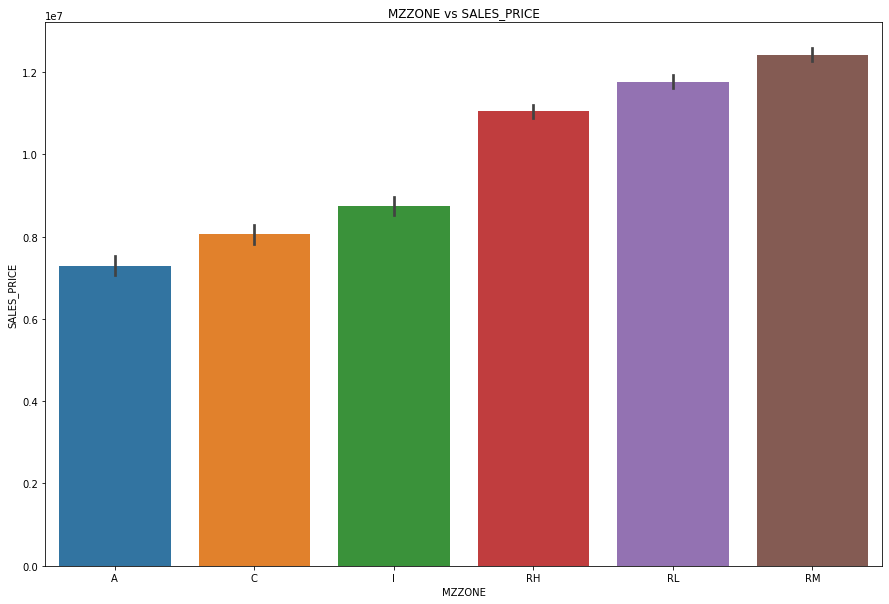

In [206]:
plt.figure(figsize=(15,10))
sns.barplot(x=df.MZZONE,y=df.SALES_PRICE,order=df.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE'])
plt.title('MZZONE vs SALES_PRICE')

# **There is relationship between the feature and target.**

Text(0.5, 1.0, 'N_ROOM vs SALES_PRICE')

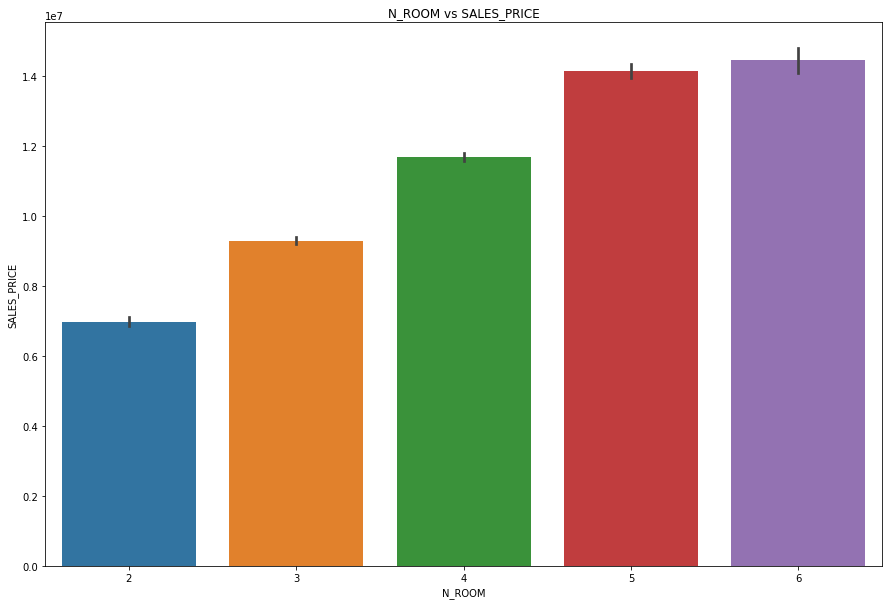

In [207]:
plt.figure(figsize=(15,10))
sns.barplot(x=df.N_ROOM,y=df.SALES_PRICE,order=df.groupby('N_ROOM')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['N_ROOM'])
plt.title('N_ROOM vs SALES_PRICE')

Text(0.5, 1.0, 'UTILITY_AVAIL vs SALES_PRICE')

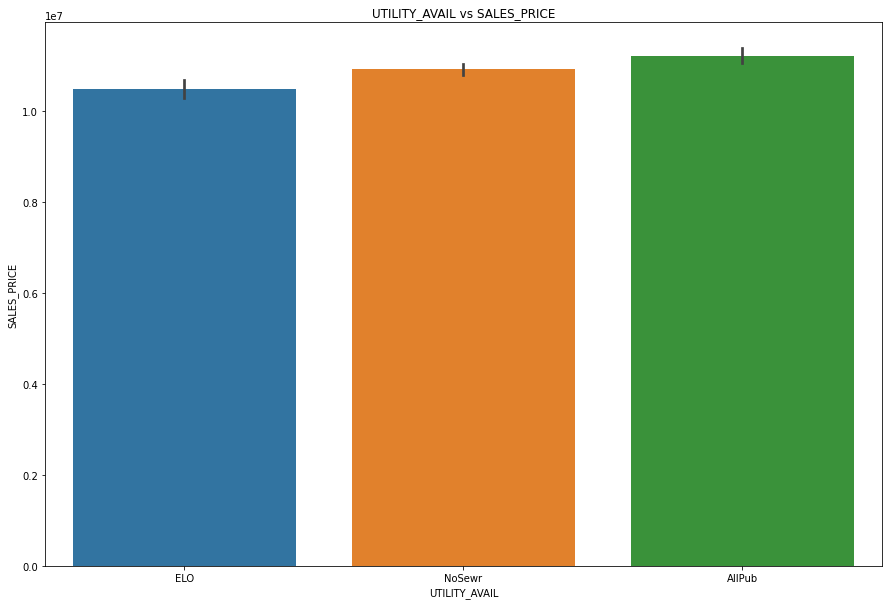

In [219]:
plt.figure(figsize=(15,10))
sns.barplot(x=df.UTILITY_AVAIL,y=df.SALES_PRICE,order=df.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL'])
plt.title('UTILITY_AVAIL vs SALES_PRICE')

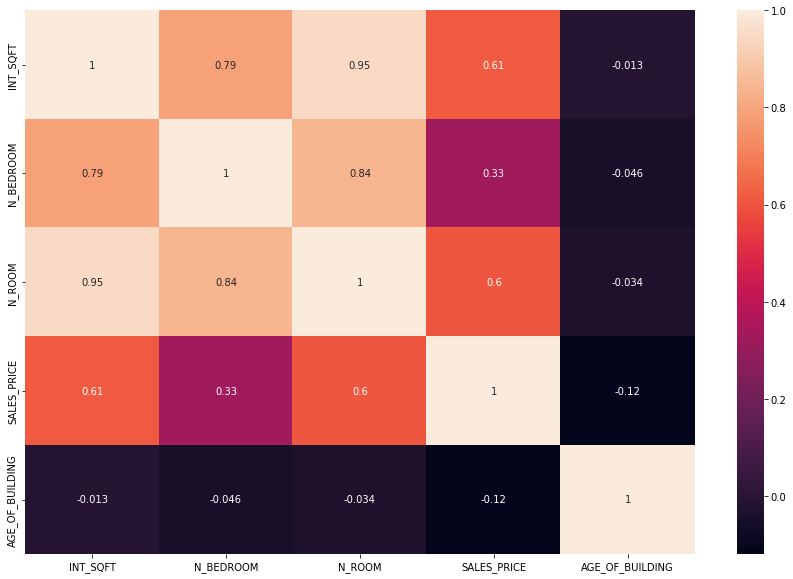

In [208]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

# **There is relationship between the feature and target.**

**OVERALL OBSERVATIONS:**

**There is a linear relationship between Area, MZ Zone, N ROOM, N BEDROOM, STREET,SALE COND and TOTAL SALE PRICE.**

**For AREA, STREET, MZ ZONE, and SALE COND, we apply ordinal label encoding ** **bold text**

**Although there is no linear relationship, BUILDTYPE does impact SALE PRICE** 

**Therefore, for this column, we choose one hot encoding.**

**There is a linear relationship between UTILITY AVAIL and STREET and TOTAL SALE PRICE. but, having less of an impact than other features.** 




## **ENCODING**

**Label encoding for the Area, MZ Zone, N ROOM, N BEDROOM, STREET,SALE COND and TOTAL SALE PRICE since there is linear relatonship with the target**

In [209]:
df.head()

,AREA,INT_SQFT,N_BEDROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE_OF_BUILDING
0,Karapakkam,1004,1,3,AbNormal,Yes,Commercial,AllPub,Paved,A,7600000,43
1,Anna Nagar,1986,2,5,AbNormal,No,Commercial,AllPub,Gravel,RH,21717770,10
2,Adyar,909,1,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,13159200,19
3,Velachery,1855,3,5,Family,No,Others,NoSewr,Paved,I,9630290,21
4,Karapakkam,1226,1,3,AbNormal,Yes,Others,AllPub,Gravel,C,7406250,29


In [210]:
df["AREA"].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

In [212]:
df["AREA"] = df["AREA"].map({"Karapakkam": 0,"Adyar": 1, "T Nagar": 6, "Chrompet": 2, "Velachery": 3, "Anna Nagar" : 5,"KK Nagar" : 4})

In [214]:
df["SALE_COND"].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale'],
      dtype=object)

In [215]:
df["SALE_COND"] = df["SALE_COND"].map({"Partial": 0,"Family": 1,"AbNormal": 2, "Normal Sale": 3,"AdjLand" : 4})

In [218]:

df["UTILITY_AVAIL"].unique()

array(['AllPub', 'ELO', 'NoSewr'], dtype=object)

In [220]:
df["UTILITY_AVAIL"] = df["UTILITY_AVAIL"].map({"ELO": 0,"NoSewr" : 1 , "AllPub": 2})

In [222]:
df["STREET"].unique()

array(['Paved', 'Gravel', 'No Access'], dtype=object)

In [223]:
df["STREET"] = df["STREET"].map({"No Access": 0,"Paved": 1, "Gravel": 2})

In [224]:
df["MZZONE"].unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

In [225]:
df["MZZONE"] = df["MZZONE"].map({"A": 0,"C": 1, "I": 2, "RH": 3, "RL": 4, "RM" : 5})

In [227]:
df["PARK_FACIL"] = df["PARK_FACIL"].replace({"No": 0, "Yes": 1})

# **One hot encoding for BUILDTYPE**

In [226]:
df = pd.get_dummies(df, columns=["BUILDTYPE"])

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   AREA                  7109 non-null   int64
 1   INT_SQFT              7109 non-null   int64
 2   N_BEDROOM             7109 non-null   int64
 3   N_ROOM                7109 non-null   int64
 4   SALE_COND             7109 non-null   int64
 5   PARK_FACIL            7109 non-null   int64
 6   UTILITY_AVAIL         7109 non-null   int64
 7   STREET                7109 non-null   int64
 8   MZZONE                7109 non-null   int64
 9   SALES_PRICE           7109 non-null   int64
 10  AGE_OF_BUILDING       7109 non-null   int64
 11  BUILDTYPE_Commercial  7109 non-null   uint8
 12  BUILDTYPE_House       7109 non-null   uint8
 13  BUILDTYPE_Others      7109 non-null   uint8
dtypes: int64(11), uint8(3)
memory usage: 631.9 KB


# **SPLITTING THE DATASET:**

In [229]:
from sklearn.model_selection import train_test_split
X=df.drop(['SALES_PRICE'],axis=1)
Y=df['SALES_PRICE']

In [230]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2, random_state=5)

# **1. LINEAR REGRESSION**

In [231]:
#importing all the required functions
from sklearn.linear_model import LinearRegression

In [232]:
#Building the Model
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [233]:
#FINAL PREDICTIONS:
y_pred = lr.predict(x_test)
y_pred

array([11178629.6519753 , 14289819.91027833, 14544129.84454743, ...,
        6594915.33115681,  8762582.25797122, 15498722.90143582])

In [234]:
#EVALUVATING THE MODEL:
from sklearn import metrics
lr1 = metrics.r2_score(y_test,y_pred)
print('R2- SCORE FOR LINEAR REGRESSION:', round((lr1*100),2),"%")

R2- SCORE FOR LINEAR REGRESSION: 92.9 %


# **2. K-NEAREST NEIGHBOUR MODEL**

In [235]:
# Scaling the test and train data

from sklearn.preprocessing import StandardScaler # importing the required function
scaler = StandardScaler() #initialis
scaler.fit(x_train) # find the values of mu and sigma
X_train = scaler.transform(x_train)
X_test = scaler.transform(x_test)

In [236]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

for i in [1,2,3,4,5,6,7,8,9,10,20,40,50,80,100]:
  knn = KNeighborsRegressor(i) #initialising the model
  knn.fit(X_train,y_train) # training the model
  print("K value  : " , i, " score : ", metrics.r2_score(y_test,y_pred))

K value  :  1  score :  0.9289563812341199
K value  :  2  score :  0.9289563812341199
K value  :  3  score :  0.9289563812341199
K value  :  4  score :  0.9289563812341199
K value  :  5  score :  0.9289563812341199
K value  :  6  score :  0.9289563812341199
K value  :  7  score :  0.9289563812341199
K value  :  8  score :  0.9289563812341199
K value  :  9  score :  0.9289563812341199
K value  :  10  score :  0.9289563812341199
K value  :  20  score :  0.9289563812341199
K value  :  40  score :  0.9289563812341199
K value  :  50  score :  0.9289563812341199
K value  :  80  score :  0.9289563812341199
K value  :  100  score :  0.9289563812341199


In [237]:
from sklearn.neighbors import KNeighborsRegressor
KNN=KNeighborsRegressor()
KNN.fit(X_train,y_train)

KNeighborsRegressor()

In [238]:
y_pred_KNN = KNN.predict(X_test)
y_pred_KNN

array([10003920., 12573304., 13347850., ...,  7370519.,  9915578.,
       13774550.])

In [239]:
from sklearn import metrics
KNN1 = metrics.r2_score(y_test,y_pred_KNN)
print('R2- SCORE FOR KNN MODEL:', round((KNN1*100),2),"%")

R2- SCORE FOR KNN MODEL: 95.01 %


# **3. DECISION TREE MODEL**

In [240]:
#First, we must identify the proper depth for decision tree model.
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
import numpy as np

for depth in [1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,100]:
  dt = DecisionTreeRegressor(max_depth=depth)
  dt.fit(x_train, y_train) # the model is trained
  valAccuracy = cross_val_score(dt, x_train, y_train, cv=10, scoring = make_scorer(metrics.r2_score))
  print("DEPTH: ",depth,"R2-Score: ",np.mean(valAccuracy))

DEPTH:  1 R2-Score:  0.3591784817466277
DEPTH:  2 R2-Score:  0.6780398901388676
DEPTH:  3 R2-Score:  0.8015433917088064
DEPTH:  4 R2-Score:  0.8813189605143232
DEPTH:  5 R2-Score:  0.9146193210292239
DEPTH:  6 R2-Score:  0.9350839462186743
DEPTH:  7 R2-Score:  0.9491409628788705
DEPTH:  8 R2-Score:  0.9594950649824956
DEPTH:  9 R2-Score:  0.9659401309963839
DEPTH:  10 R2-Score:  0.9698890694325808
DEPTH:  20 R2-Score:  0.9721116493127756
DEPTH:  30 R2-Score:  0.9719683765439463
DEPTH:  40 R2-Score:  0.9722153013458013
DEPTH:  50 R2-Score:  0.9723871593724718
DEPTH:  60 R2-Score:  0.9717940900976814
DEPTH:  100 R2-Score:  0.9720654953968024


In [241]:
# FITTING THE MODEL:

dt = DecisionTreeRegressor(max_depth=50)
dt.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=50)

In [242]:
y_pred_dt = dt.predict(x_test)
y_pred_dt

array([ 9618640., 14054970., 13797720., ...,  6996125.,  9481950.,
       14920370.])

In [243]:
# Actual vs Predicted values

result_dt=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred_dt})
result_dt

,Actual,Predicted
6107,9866820,9618640.0
6964,14238410,14054970.0
6580,13547020,13797720.0
1036,14048900,14200900.0
1469,7439700,7195550.0
...,...,...
6279,12181500,12873650.0
6190,13491940,14088220.0
1828,6408750,6996125.0
5125,9387600,9481950.0


In [244]:
from sklearn import metrics
dt1 = metrics.r2_score(y_test,y_pred_dt)
print('R2- SCORE FOR DECISION TREE MODEL:', round((dt1*100),2),"%")

R2- SCORE FOR DECISION TREE MODEL: 97.56 %


# **4. RANDOM FOREST MODEL:**

In [245]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

rf = RandomForestRegressor(n_estimators= 150, max_depth = 10, max_features='sqrt')
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, max_features='sqrt', n_estimators=150)

In [246]:
y_pred_rf = rf.predict(x_test)

In [247]:
result_rf= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})
result_rf

,Actual,Predicted
6107,9866820,1.000801e+07
6964,14238410,1.367197e+07
6580,13547020,1.293700e+07
1036,14048900,1.328149e+07
1469,7439700,7.478982e+06
...,...,...
6279,12181500,1.250480e+07
6190,13491940,1.299586e+07
1828,6408750,6.900221e+06
5125,9387600,9.574294e+06


In [248]:
from sklearn import metrics
rf1 = metrics.r2_score(y_test,y_pred_rf)
print('R2- SCORE FOR RANDOM FOREST MODEL :', round((rf1*100),2),"%")

R2- SCORE FOR RANDOM FOREST MODEL : 97.95 %


# **5. XG-BOOST MODEL:**

In [249]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
for lr in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
  model.fit(x_train,y_train) #train the model
  model.score(x_test, y_test) # scoring the model - r2 squared

In [250]:
xg_model = xgb.XGBRegressor(learning_rate = 0.7, n_estimators=100, verbosity = 0)
xg_model.fit(x_train,y_train) #train the model
xg_model.score(x_test, y_test) # scoring the model - r2 squared

0.9972622987868862

In [251]:
XG_pred= model.predict(x_test)

In [252]:
result_XG= pd.DataFrame({"Actual": y_test, "Predicted": XG_pred})
result_XG

,Actual,Predicted
6107,9866820,9952780.0
6964,14238410,14432312.0
6580,13547020,13593350.0
1036,14048900,14258780.0
1469,7439700,7221733.0
...,...,...
6279,12181500,12092142.0
6190,13491940,13364968.0
1828,6408750,6403532.5
5125,9387600,9232186.0


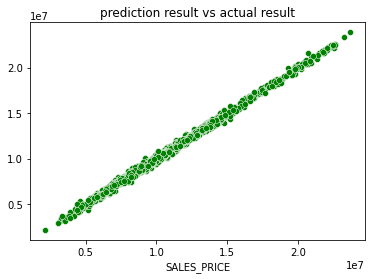

In [253]:
sns.scatterplot(x= y_test, y=XG_pred, color=["green"])
plt.title("prediction result vs actual result")
plt.show()

In [254]:
from sklearn import metrics
XG1 = metrics.r2_score(y_test,XG_pred)
print('R2- SCORE FOR XG-BOOST MODEL:', round((XG1*100),2),"%")

R2- SCORE FOR XG-BOOST MODEL: 99.67 %


<Figure size 3600x3600 with 0 Axes>

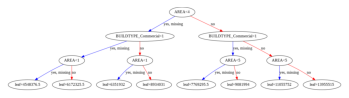

In [257]:
from xgboost import plot_tree
plt.figure(figsize=(50,50))
plot_tree(xg_model)

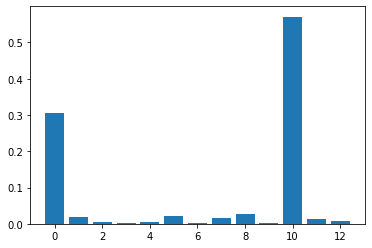

In [258]:
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

# **FINDING THE BEST MODEL:**

In [259]:
print("R2 SCORE FOR ALL MODELS:")
print()
print('R2- SCORE FOR LINEAR REGRESSION:', round((lr1*100),2),"%")
print('R2- SCORE FOR KNN MODEL:', round((KNN1*100),2),"%")
print('R2- SCORE FOR DECISION TREE MODEL:', round((dt1*100),2),"%")
print('R2- SCORE FOR RANDOM FOREST MODEL :', round((rf1*100),2),"%")
print('R2- SCORE FOR XG-BOOST MODEL:', round((XG1*100),2),"%")

R2 SCORE FOR ALL MODELS:

R2- SCORE FOR LINEAR REGRESSION: 92.9 %
R2- SCORE FOR KNN MODEL: 95.01 %
R2- SCORE FOR DECISION TREE MODEL: 97.56 %
R2- SCORE FOR RANDOM FOREST MODEL : 97.95 %
R2- SCORE FOR XG-BOOST MODEL: 99.67 %


In [260]:
r2={'R2_score':['LR', 'KNN', 'DT', 'RF',"XG"],
        'score':[92.91, 94.43, 97.15, 97.5,99.71]}
R2_df=pd.DataFrame(r2)
R2_df

,R2_score,score
0,LR,92.91
1,KNN,94.43
2,DT,97.15
3,RF,97.50
4,XG,99.71


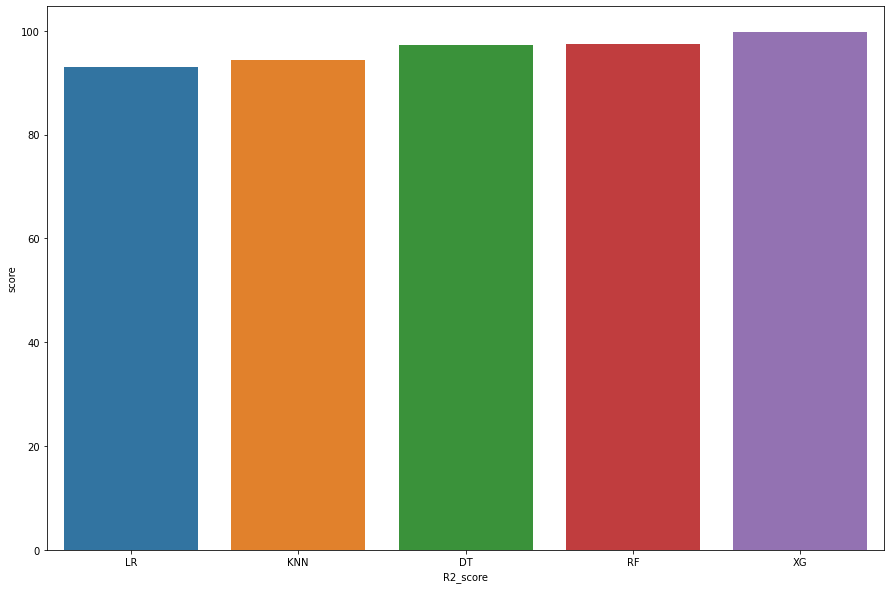

In [261]:
plt.figure(figsize=(15,10))
sns.barplot(x=R2_df.R2_score,y=R2_df.score)

# **FEATURE IMPORTANCE**


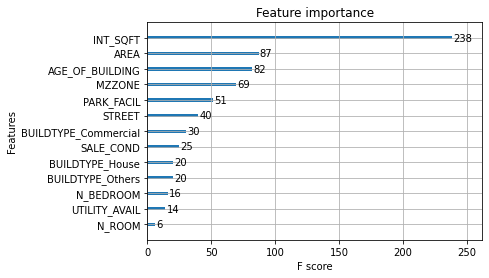

In [262]:
from xgboost import plot_importance

# plot feature importance
plot_importance(model)
plt.show()

In [263]:
feature_scores = pd.Series(model.feature_importances_,index=x_train.columns).sort_values(ascending=False)
feature_scores = feature_scores*100
feature_scores

BUILDTYPE_Commercial    57.101353
AREA                    30.610010
MZZONE                   2.802037
PARK_FACIL               2.205051
INT_SQFT                 2.006614
STREET                   1.511002
BUILDTYPE_House          1.320957
BUILDTYPE_Others         0.757632
SALE_COND                0.603122
N_BEDROOM                0.365874
UTILITY_AVAIL            0.243846
N_ROOM                   0.243125
AGE_OF_BUILDING          0.229378
dtype: float32

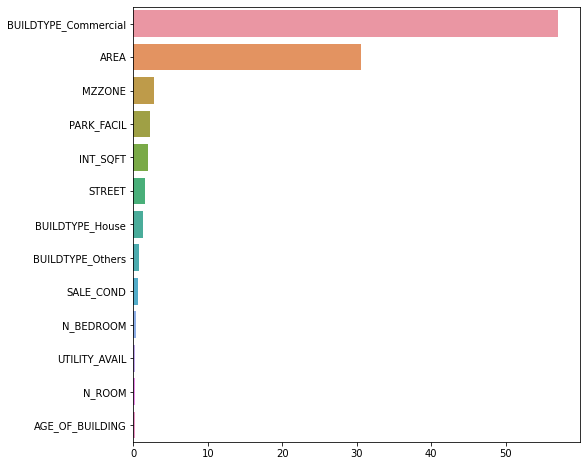

In [264]:
plt.figure(figsize=(8,8))
sns.barplot(x=feature_scores,y=feature_scores.index)

In [265]:
main_features=feature_scores.loc[feature_scores >1]
main_features

BUILDTYPE_Commercial    57.101353
AREA                    30.610010
MZZONE                   2.802037
PARK_FACIL               2.205051
INT_SQFT                 2.006614
STREET                   1.511002
BUILDTYPE_House          1.320957
dtype: float32

OBSERVATIONS:

THESE ARE THE FEATURES MORE IMPORTANTLY IMPACTING OUR XG BOOST MODEL RESULTS.

BUILDTYPE_Commercial 40.700150

AREA 37.157658

INT_SQFT 4.126828

MZZONE 3.865907

STREET 3.694559

PARK_FACIL 3.0312774

BUILDTYPE_House 2.770039



In [266]:
score=[40.700150, 37.157658, 4.126828, 3.865907,3.694559,3.031277,2.770039,1.643945]
features=['BUILDTYPE_Commercial', 'AREA', 'INT_SQFT', 'MZZONE',"STREET","PARK_FACIL","BUILDTYPE_House","N_BEDROOM"]

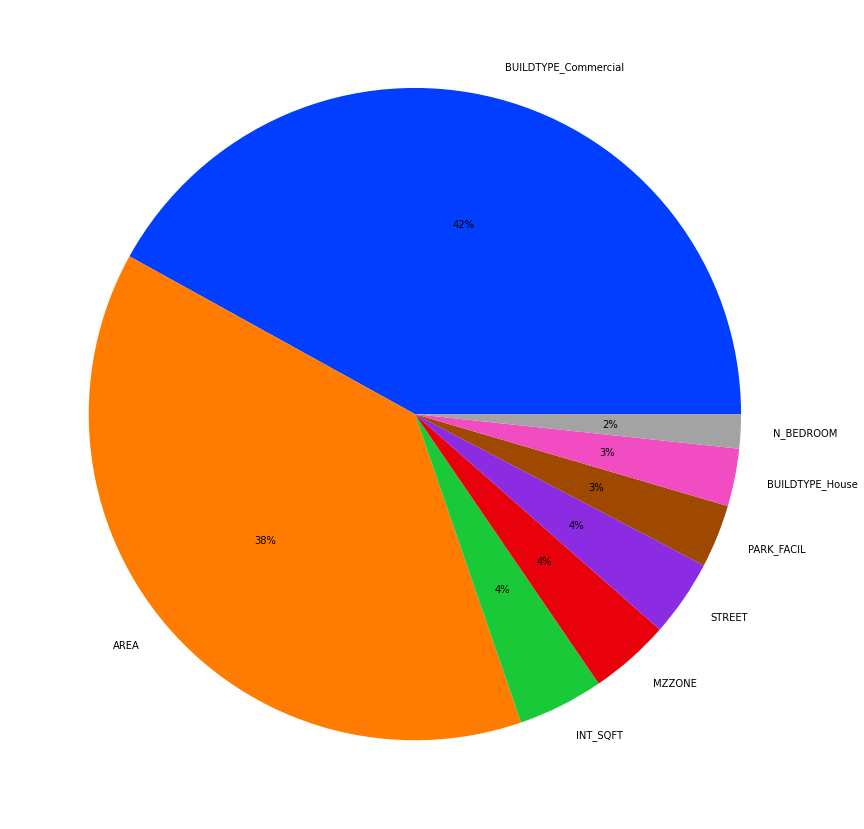

In [267]:
plt.figure(figsize=(15,15))
colors = sns.color_palette('bright')
plt.pie(score, labels=features,colors = colors, autopct = '%0.0f%%')
plt.show()